# This is the begining of implementeing linear regression using python

In [1]:
import pandas, sklearn, numpy
import matplotlib.pyplot as plt

### loading the dataset [students performance on final exam of portuges language]
#### the dataset consists of 32 student features we only care about G1, G2 and G3
#### G1 -> first period grade (numeric: from 0 to 20)
#### G2 -> second period grade (numeric: from 0 to 20)
#### G3 -> final grade (numeric: from 0 to 20, output target)

In [14]:
location = 'Datasets/Regression/'

In [15]:
df = pandas.read_csv(location + 'student-por.csv',usecols=[30,31,32])
df.head()

,G1,G2,G3
0,0,11,11
1,9,11,11
2,12,13,12
3,14,14,14
4,11,13,13


#### Because we are developing single variable linear regression we need to take only one input and we have two G1 and G2 so I am taking the average of both grades

In [16]:
df['G1'] = (df['G1'] + df['G2']) /2

#### removing column G2 as we took the avg

In [17]:
del df['G2']

In [18]:
df.head()

,G1,G3
0,5.5,11
1,10.0,11
2,12.5,12
3,14.0,14
4,12.0,13


#### changing columns names

In [19]:
df.columns = ['avg','final']
df.head()

,avg,final
0,5.5,11
1,10.0,11
2,12.5,12
3,14.0,14
4,12.0,13


#### Plotting the data for better understanding

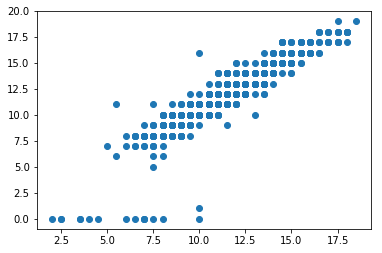

In [20]:
plt.scatter(df['avg'], df['final'])
plt.show()

In [21]:
test_set = pandas.read_csv(location + 'student-mat.csv',usecols=[30,31,32])

In [22]:
test_set['G1'] = (test_set['G1'] + test_set['G2']) /2
del test_set['G2']
test_set.columns = ['avg', 'final']

#### this how the test set looks like

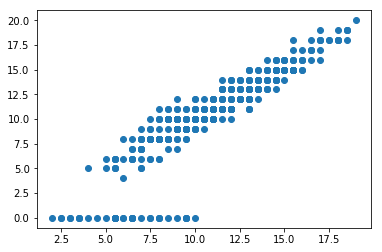

In [23]:
plt.scatter(test_set['avg'], test_set['final'])
plt.show()

### using the implemented linear regression from sklearn library 

In [24]:
from sklearn import linear_model
model = linear_model.LinearRegression()

In [25]:
model.fit(df['avg'].reshape(-1,1), df['final'])

c:\users\ahmed\ml\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### finding theta 0, and theta 1 

In [31]:
sklearn_theta = [model.intercept_, model.coef_[0]]
print sklearn_theta

[-0.38147111150464674, 1.0699100759866527]


#### defining our cost function 

In [ ]:
def cost(X, Y, theta):
    hypothesis = theta[0] + theta[1] * X
    #print hypothesis
    #print Y
    summation = sum((hypothesis - Y) * (hypothesis - Y))
    c =  summation/ (2*len(Y))
    return c

In [41]:
hypothesis = model.intercept_  + model.coef_[0]* df['avg']
hypothesis.head()

0     5.503034
1    10.317630
2    12.992405
3    14.597270
4    12.457450
Name: avg, dtype: float64

In [89]:
def gradientdescent(X, Y, alpha, theta, num_iter):
    m = len(Y)
    cost_history = []
    for i in xrange(num_iter):
        hypothesis = theta[0] + theta[1] * X
        for j in xrange(len(theta)):
            if j == 0:
                theta[j] = theta[j] - alpha * (sum(hypothesis - Y)/m)
            else:
                theta[j] = theta[j] - alpha * ( sum((hypothesis - Y)* X)/m)
        #print theta        
        cost_history.append(cost(X,Y, theta))
        # append cost for each theta into a matrix so at the end we get list of all costs 
    return theta, cost_history

##### testing our implemented cost function over the sklearn produced theta and we got pretty small cost

In [264]:
cost(df['avg'], df['final'], sklearn_theta )

0.9440275170415734

In [223]:
(grad_theta, cost_history) = gradientdescent(df['avg'], df['final'], .01, [0,0] , 5000)

#### After 5000 iterations and with alpha = .01 we got this theta and the cost history for every iteration

In [265]:
print grad_theta
print cost(df['avg'], df['final'],grad_theta)

[-0.34875203673176514, 1.067212493445578]
0.944056150449


after that we are  trying to plot the iterations and cost history, it's supposed to graph 5000 iterations but to make things clear and to make the 
change in the cost values much clearer I only plotted the first 10 iterations cause after that the cost changes slightly 

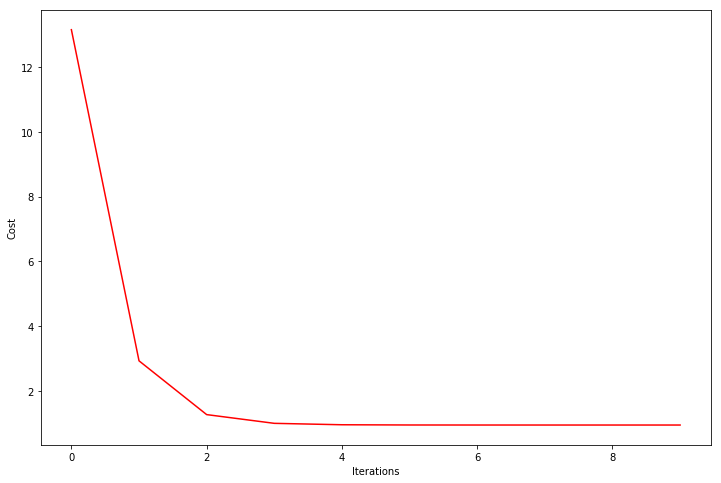

In [279]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(xrange(10),cost_history[0:10], 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')
fig

### this is difference of the cost when we use the built in algorithm and our implemented one

In [225]:
print cost(test_set['avg'],test_set['final'], sklearn_theta)
print cost(test_set['avg'],test_set['final'], grad_theta)

2.56967843492
2.57641598267


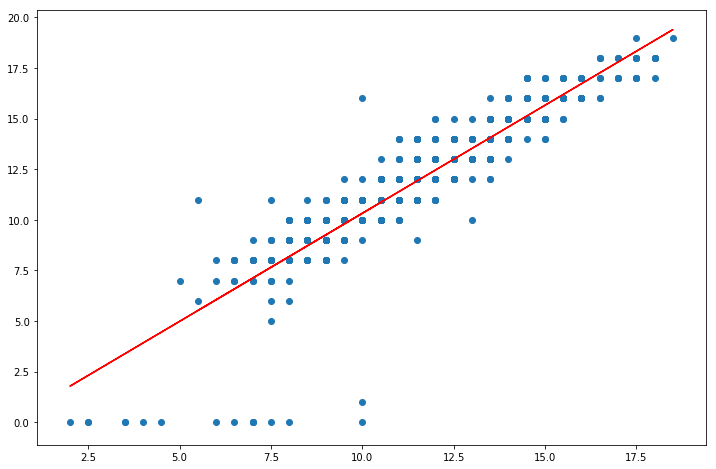

In [281]:
plt.scatter(df['avg'], df['final'])
plt.show()  
f = grad_theta[0] + (grad_theta[1] * df['avg'])
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(df['avg'], f, 'r', label='Prediction')